## Weather Image Recognition

In [ ]:
#Import libraries
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
import zipfile

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

Device:  cuda


In [ ]:
# !pip install kaggle
!mkdir -p /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"rmwizerw","key":"1843bfa77797207050673f8c0cd032cb"}')
    #Be able to access Kaggle files

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Import Google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#download data from kaggle
!kaggle datasets download -d jehanbhathena/weather-dataset
!mkdir -p "/content/data"

!unzip -qo "weather-dataset" -d "/content/data"

 96% 561M/587M [00:05<00:00, 143MB/s]
100% 587M/587M [00:05<00:00, 112MB/s]


In [ ]:
#data directories
data = "/content/data/dataset"
!mkdir -p "/content/data/train" "/content/data/valid" "/content/data/test"

train, valid, test = "/content/data/train", "/content/data/valid", "/content/data/test"

In [ ]:
# Define the split ratio
train_ratio = 0.7
test_ratio = 0.15

# Loop through subfolders and split the data
for subfolder in os.listdir(data):
    class_path = os.path.join(data, subfolder)

    files = os.listdir(class_path)
    random.shuffle(files)
    train_split = int(train_ratio * len(files))
    test_split = int(test_ratio * len(files))

    train_files = files[ : train_split]
    test_files = files[train_split : train_split + test_split]
    valid_files = files[train_split + test_split : ]

    # Create subdirectories for each class in the train, test, and valid directories
    os.makedirs(os.path.join(train, subfolder), exist_ok=True)
    os.makedirs(os.path.join(test, subfolder), exist_ok=True)
    os.makedirs(os.path.join(valid, subfolder), exist_ok=True)

    # Move files to respective directories
    for file in train_files:
        try:
            shutil.move(os.path.join(class_path, file), os.path.join(train, subfolder))
        except Exception as e:
            print(f'Error moving {file} to train: {e}')
    for file in test_files:
        try:
            shutil.move(os.path.join(class_path, file), os.path.join(test, subfolder))
        except Exception as e:
            print(f'Error moving {file} to test: {e}')
    for file in valid_files:
        try:
            shutil.move(os.path.join(class_path, file), os.path.join(valid, subfolder))
        except Exception as e:
            print(f'Error moving {file} to valid: {e}')

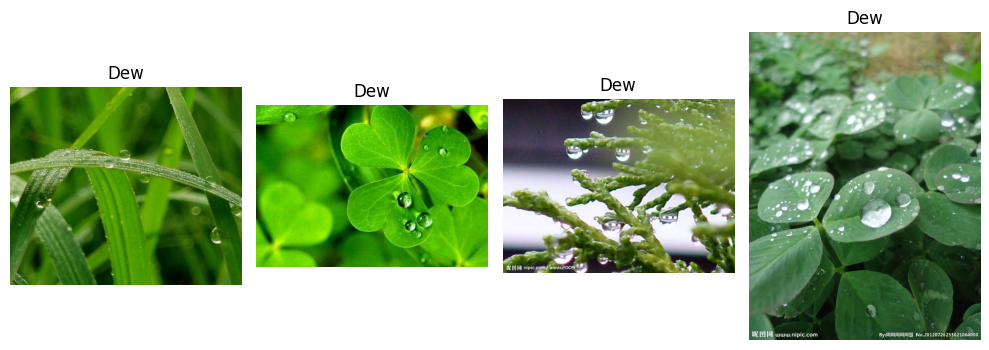

In [ ]:
#Get the full path of the folder
folder_path = "/content/data/train/dew"

#Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

#Create a new figure with a specific size and grid layout
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

#Iterate through the images and plot them in the grid
for i in range(4):
    #Calculate the subplot index
    #row_idx = 0
    col_idx = i

    #Read the image file using matplotlib.image.imread
    image = plt.imread(os.path.join(folder_path, image_files[i]))
    axes[col_idx].imshow(image)
    axes[col_idx].set_title("Dew")
    axes[col_idx].axis('off')

fig.tight_layout()
#Show the figure
plt.show()